In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [41]:
df_2004 = pd.read_csv('data/건강검진정보_2004.CSV', encoding='euc-kr', low_memory=False)
df_2009 = pd.read_csv('data/건강검진정보_2009(수정).csv', encoding='euc-kr', low_memory=False)
df_2014 = pd.read_csv('data/건강검진정보_2014.CSV', encoding='euc-kr', low_memory=False)
df_2018 = pd.read_csv('data/건강검진정보_2018.csv', encoding='euc-kr')
df_2019 = pd.read_csv('data/건강검진정보_2019(수정).csv', encoding='euc-kr', low_memory=False)

In [42]:
df_2018['BMI'] =df_2018['체중(5Kg단위)'] /(df_2018['신장(5Cm단위)']/100) **2
df_2018['BMI']

0         23.437500
1         19.031142
2         25.711662
3         20.000000
4         23.781213
            ...    
999995    27.548209
999996    25.951557
999997    26.122449
999998    25.711662
999999    22.038567
Name: BMI, Length: 1000000, dtype: float64

In [43]:
df_2018['이상지질혈증'] =(df_2018['총콜레스테롤']>=201) | (df_2018['트리글리세라이드']>=151)|(df_2018['HDL콜레스테롤']>=61)|(df_2018['LDL콜레스테롤']>=131)
df_2018['이상지질혈증']

0         False
1         False
2         False
3          True
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Name: 이상지질혈증, Length: 1000000, dtype: bool

In [44]:
df_2018['비만'] = (df_2018['BMI'] >= 25)
df_2018['정상'] = (df_2018['BMI'] < 25)

In [45]:
df_2018['비흡연자'] = (df_2018['흡연상태'] == 1) | (df_2018['흡연상태'] == 2) == True
df_2018['흡연자'] = (df_2018['흡연상태'] == 3) == True


In [46]:
df_2018['음주여부'] = df_2018['음주여부'].fillna(0)

In [47]:
df_2018['음주'] = (df_2018['음주여부'] == 1) == True
df_2018['음주(X)'] = (df_2018['음주여부'] == 0) == True

In [48]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','이상지질혈증','음주(X)']]
df_2018_all.dropna(inplace=True) 
df_2018_all.isna().sum()
df_2018_all = df_2018_all.pivot_table('이상지질혈증','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all.head()

정상          False                   True                   
비흡연자        False       True        False       True       
음주(X)       False True  False True  False True  False True 
연령대코드(5세단위)                                                
5            0.20  0.14  0.13  0.12  0.17  0.16  0.06  0.07
6            0.17  0.17  0.12  0.10  0.13  0.09  0.06  0.05
7            0.16  0.14  0.14  0.10  0.13  0.10  0.07  0.04
8            0.18  0.15  0.15  0.11  0.16  0.14  0.09  0.05
9            0.43  0.40  0.41  0.39  0.41  0.38  0.42  0.40

In [49]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','이상지질혈증','음주(X)']]
df_2018_all = df_2018_all.pivot_table('이상지질혈증','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all=df_2018_all*100
# 정상, 비흡연, 비음주
df_2018_T =  df_2018_all[True][True][True]
df_2018_T = pd.DataFrame(df_2018_T)
# 비만, 비흡연, 비음주
df_2018_bmiF =  df_2018_all[False][True][True]
df_2018_bmiTF = pd.merge(df_2018_T, df_2018_bmiF, left_index=True, right_index=True)
df_2018_bmiTF.columns=['정상','비만']
df_2018_bmiTF['비만/정상'] =(df_2018_bmiTF['비만'] / df_2018_bmiTF['정상']).round(1)
df_2018_bmiTF.head()

,정상,비만,비만/정상
연령대코드(5세단위),,,
5,7.0,12.0,1.7
6,5.0,10.0,2.0
7,4.0,10.0,2.5
8,5.0,11.0,2.2
9,40.0,39.0,1.0


(0.0, 50.0)

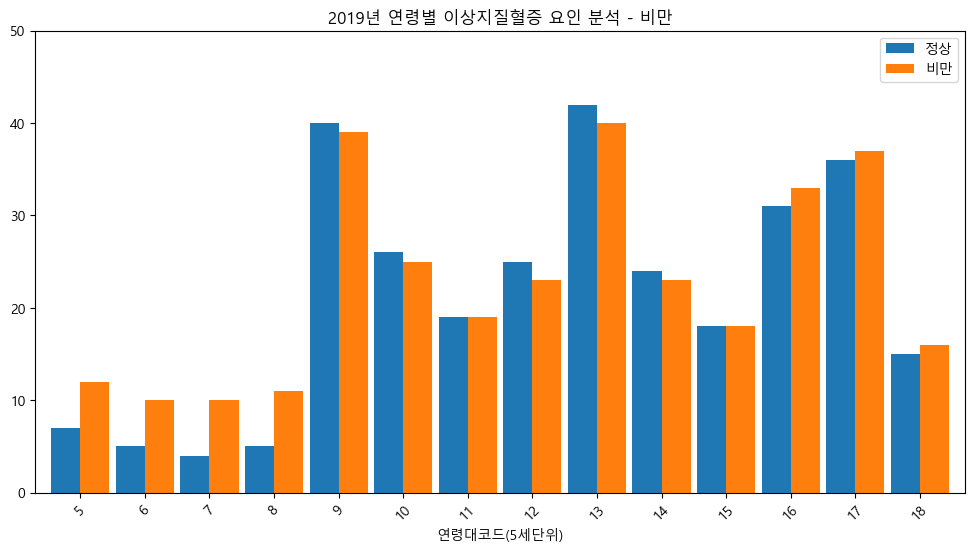

In [50]:
df_2018_bmiTF.iloc[:,:2].plot.bar(width=0.9,rot=45,figsize=(12,6))
plt.title('2019년 연령별 이상지질혈증 요인 분석 - 비만')
plt.ylim(0,50)

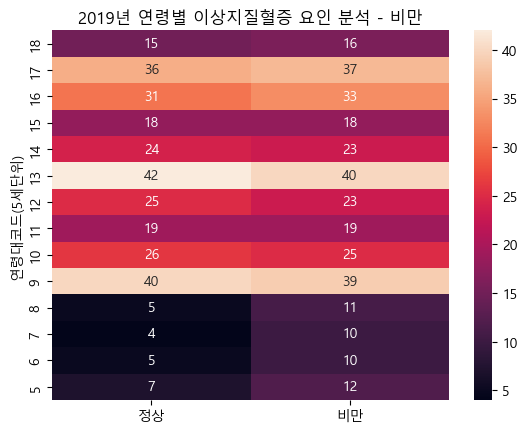

In [51]:
import seaborn as sns
sns.heatmap(df_2018_bmiTF.iloc[:,:2].sort_index(ascending=False),annot=True)
plt.title('2019년 연령별 이상지질혈증 요인 분석 - 비만');

In [52]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','이상지질혈증','음주(X)']]
df_2018_all = df_2018_all.pivot_table('이상지질혈증','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all=df_2018_all*100
# 정상, 비흡연, 비음주
df_2018_smoke =  df_2018_all[True][True][True]
df_2018_smoke = pd.DataFrame(df_2018_smoke)
# 정상, 흡연, 비음주
df_2018_smokes =  df_2018_all[True][False][True]
df_2018_smokes = pd.merge(df_2018_smoke, df_2018_smokes ,left_index=True, right_index=True)
df_2018_smokes.columns=['비흡연','흡연']
df_2018_smokes['흡연/비흡연'] =(df_2018_smokes['흡연'] / df_2018_smokes['비흡연']).round(1)
df_2018_smokes.head()

,비흡연,흡연,흡연/비흡연
연령대코드(5세단위),,,
5,7.0,16.0,2.3
6,5.0,9.0,1.8
7,4.0,10.0,2.5
8,5.0,14.0,2.8
9,40.0,38.0,1.0


(0.0, 50.0)

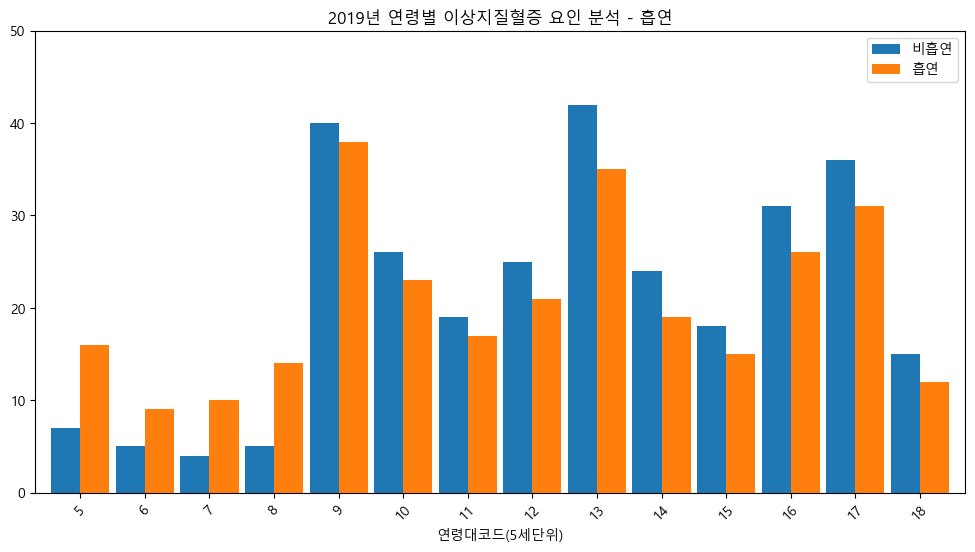

In [53]:
df_2018_smokes.iloc[:,:2].plot.bar(width=0.9,rot=45,figsize=(12,6))
plt.title('2019년 연령별 이상지질혈증 요인 분석 - 흡연')
plt.ylim(0,50)

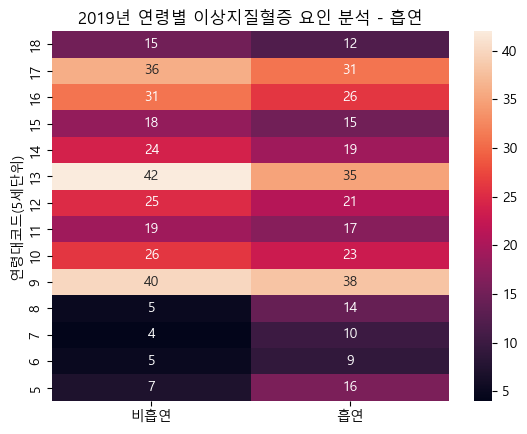

In [54]:
import seaborn as sns
sns.heatmap(df_2018_smokes.iloc[:,:2].sort_index(ascending=False),annot=True)
plt.title('2019년 연령별 이상지질혈증 요인 분석 - 흡연');

In [55]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','이상지질혈증','음주(X)']]
df_2018_all = df_2018_all.pivot_table('이상지질혈증','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all=df_2018_all*100
# 정상, 비흡연, 비음주
df_2018_drink =  df_2018_all[True][True][True]
df_2018_drink = pd.DataFrame(df_2018_drink)
# 정상, 비흡연, 음주
df_2018_drinks =  df_2018_all[True][True][False]
df_2018_drinks = pd.merge(df_2018_drink, df_2018_drinks ,left_index=True, right_index=True)
df_2018_drinks.columns=['비음주','음주']
df_2018_drinks['음주/비음주'] =(df_2018_drinks['음주'] / df_2018_drinks['비음주']).round(1)
df_2018_drinks.head()

,비음주,음주,음주/비음주
연령대코드(5세단위),,,
5,7.0,6.0,0.9
6,5.0,6.0,1.2
7,4.0,7.0,1.8
8,5.0,9.0,1.8
9,40.0,42.0,1.0


(0.0, 50.0)

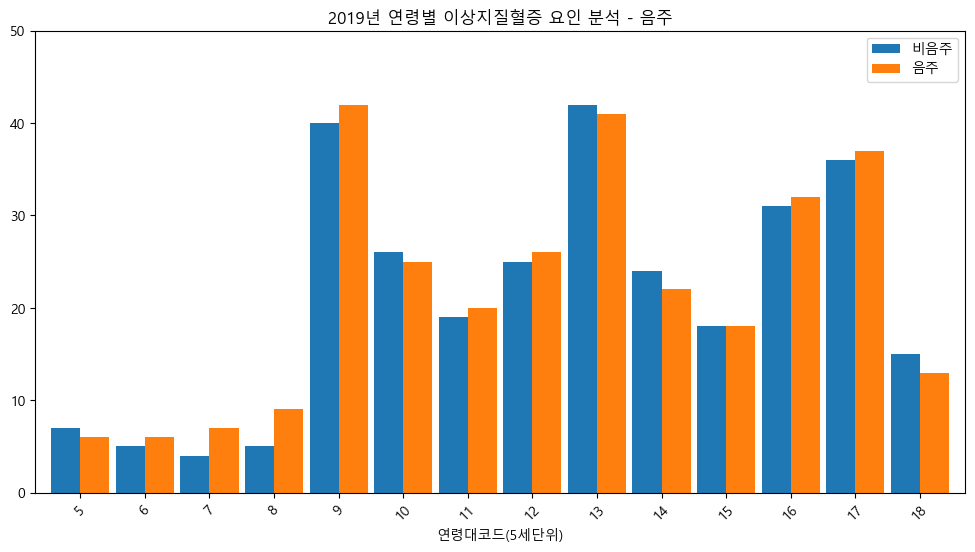

In [56]:
df_2018_drinks.iloc[:,:2].plot.bar(width=0.9,rot=45,figsize=(12,6))
plt.title('2019년 연령별 이상지질혈증 요인 분석 - 음주')
plt.ylim(0,50)

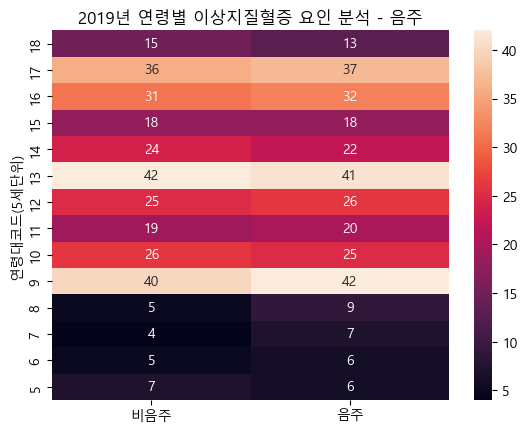

In [57]:
import seaborn as sns
sns.heatmap(df_2018_drinks.iloc[:,:2].sort_index(ascending=False),annot=True)
plt.title('2019년 연령별 이상지질혈증 요인 분석 - 음주');

In [58]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','이상지질혈증','음주(X)']]
df_2018_all = df_2018_all.pivot_table('이상지질혈증','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all=df_2018_all*100
# 정상, 비흡연, 비음주
df_2018_T =  df_2018_all[True][True][True]
df_2018_T = pd.DataFrame(df_2018_T)
# 비만, 흡연, 비음주
df_2018_F_B_S =  df_2018_all[False][False][True]
df_2018_F_B_S = pd.merge(df_2018_T, df_2018_F_B_S ,left_index=True, right_index=True)
df_2018_F_B_S.columns=['정상&비흡연','비만&흡연']
df_2018_F_B_S['비만&흡연/정상&비흡연'] =(df_2018_F_B_S['비만&흡연'] / df_2018_F_B_S['정상&비흡연']).round(1)
df_2018_F_B_S.head()

,정상&비흡연,비만&흡연,비만&흡연/정상&비흡연
연령대코드(5세단위),,,
5,7.0,14.0,2.0
6,5.0,17.0,3.4
7,4.0,14.0,3.5
8,5.0,15.0,3.0
9,40.0,40.0,1.0


(0.0, 50.0)

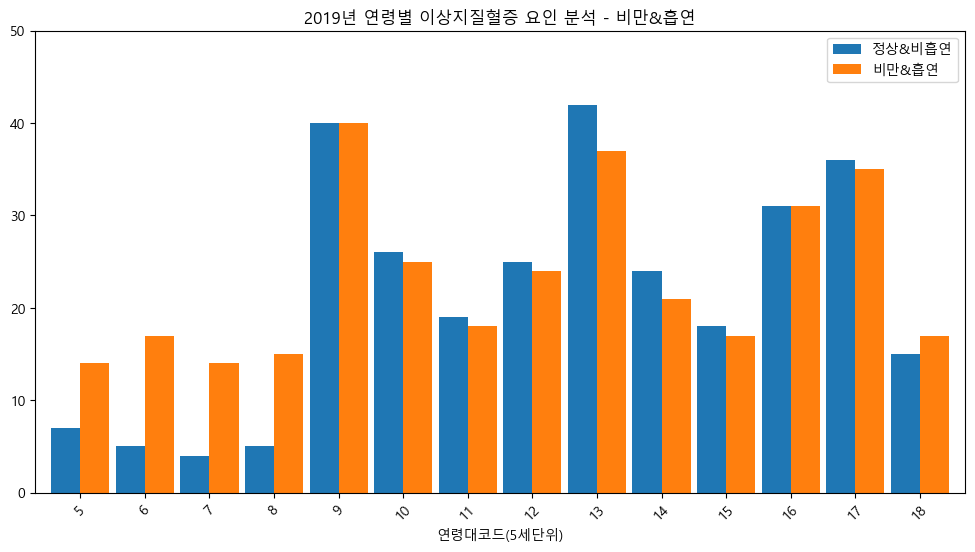

In [59]:
df_2018_F_B_S.iloc[:,:2].plot.bar(width=0.9,rot=45,figsize=(12,6))
plt.title('2019년 연령별 이상지질혈증 요인 분석 - 비만&흡연')
plt.ylim(0,50)

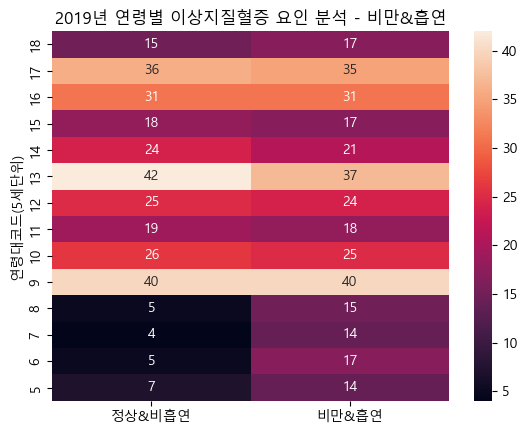

In [60]:
import seaborn as sns
sns.heatmap(df_2018_F_B_S.iloc[:,:2].sort_index(ascending=False),annot=True)
plt.title('2019년 연령별 이상지질혈증 요인 분석 - 비만&흡연');

In [61]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','이상지질혈증','음주(X)']]
df_2018_all = df_2018_all.pivot_table('이상지질혈증','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all=df_2018_all*100
# 정상, 비흡연, 비음주
df_2018_T_D =  df_2018_all[True][True][True]
df_2018_T_D = pd.DataFrame(df_2018_T_D)
# 비만, 비흡연, 음주
df_2018_F_B_D =  df_2018_all[False][True][False]
df_2018_F_B_D = pd.merge(df_2018_T_D, df_2018_F_B_D ,left_index=True, right_index=True)
df_2018_F_B_D.columns=['정상&비음주','비만&음주']
df_2018_F_B_D['비만&음주/정상&비음주'] =(df_2018_F_B_D['비만&음주'] / df_2018_F_B_D['정상&비음주']).round(1)
df_2018_F_B_D.head()

,정상&비음주,비만&음주,비만&음주/정상&비음주
연령대코드(5세단위),,,
5,7.0,13.0,1.9
6,5.0,12.0,2.4
7,4.0,14.0,3.5
8,5.0,15.0,3.0
9,40.0,41.0,1.0


(0.0, 50.0)

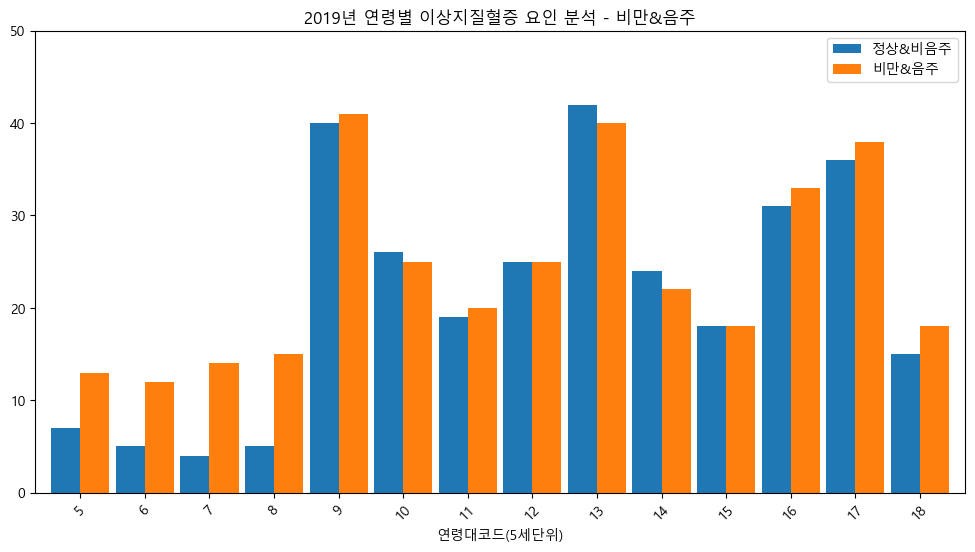

In [62]:
df_2018_F_B_D.iloc[:,:2].plot.bar(width=0.9,rot=45,figsize=(12,6))
plt.title('2019년 연령별 이상지질혈증 요인 분석 - 비만&음주')
plt.ylim(0,50)

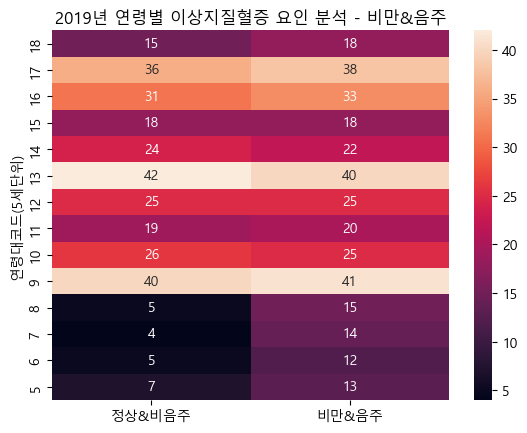

In [63]:
import seaborn as sns
sns.heatmap(df_2018_F_B_D.iloc[:,:2].sort_index(ascending=False),annot=True)
plt.title('2019년 연령별 이상지질혈증 요인 분석 - 비만&음주');

In [64]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','이상지질혈증','음주(X)']]
df_2018_all = df_2018_all.pivot_table('이상지질혈증','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all=df_2018_all*100
# 정상, 비흡연, 비음주
df_2018_T_D_S_B =  df_2018_all[True][True][True]
df_2018_T_D_S_B = pd.DataFrame(df_2018_T_D_S_B)
# 비만, 흡연, 음주
df_2018_F_D_S_B =  df_2018_all[False][False][False]
df_2018_F_D_S_B = pd.merge(df_2018_F_D_S_B, df_2018_T_D_S_B ,left_index=True, right_index=True)
df_2018_F_D_S_B.columns=['비만&흡연&음주','정상&비흡연&비음주']
df_2018_F_D_S_B['비만&흡연&음주\n정상&비흡연&비음주'] =(df_2018_F_D_S_B['비만&흡연&음주'] / df_2018_F_D_S_B['정상&비흡연&비음주']).round(1)
df_2018_F_D_S_B.head

<bound method NDFrame.head of              비만&흡연&음주  정상&비흡연&비음주  비만&흡연&음주\n정상&비흡연&비음주
연령대코드(5세단위)                                            
5                20.0         7.0                   2.9
6                17.0         5.0                   3.4
7                16.0         4.0                   4.0
8                18.0         5.0                   3.6
9                43.0        40.0                   1.1
10               25.0        26.0                   1.0
11               20.0        19.0                   1.1
12               26.0        25.0                   1.0
13               42.0        42.0                   1.0
14               18.0        24.0                   0.8
15               16.0        18.0                   0.9
16               32.0        31.0                   1.0
17               36.0        36.0                   1.0
18                0.0        15.0                   0.0>

(0.0, 50.0)

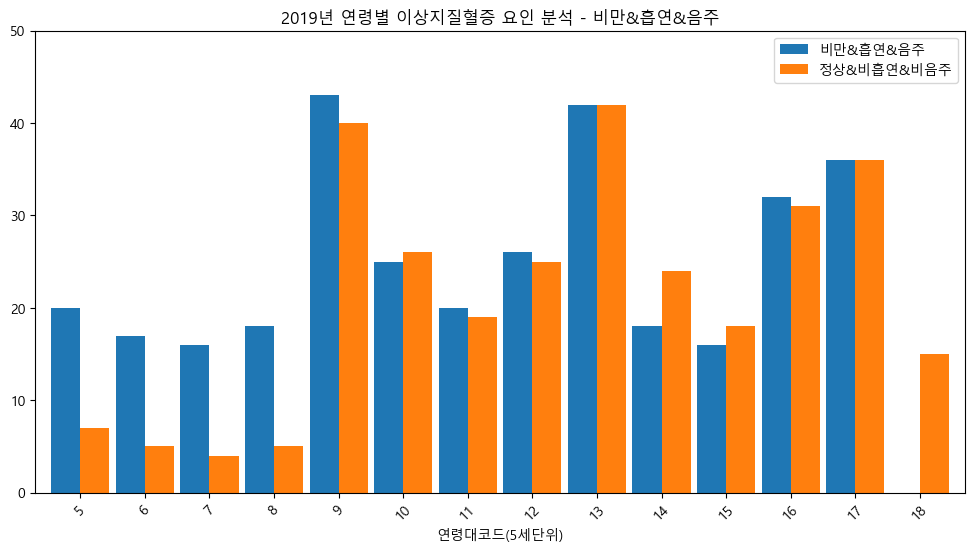

In [65]:
df_2018_F_D_S_B.iloc[:,:2].plot.bar(width=0.9,rot=45,figsize=(12,6))
plt.title('2019년 연령별 이상지질혈증 요인 분석 - 비만&흡연&음주')
plt.ylim(0,50)

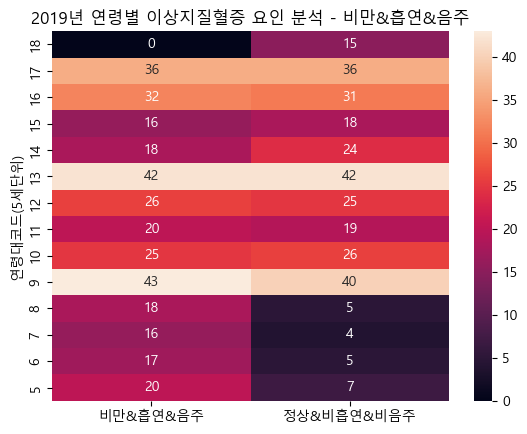

In [66]:
import seaborn as sns
sns.heatmap(df_2018_F_D_S_B.iloc[:,:2].sort_index(ascending=False),annot=True)
plt.title('2019년 연령별 이상지질혈증 요인 분석 - 비만&흡연&음주');